# Praktikum Pengantar Pembelajaran Mesin


---
## Bab 9. K-Means Clustering


### 1) Import Data

Unduh dataset yang akan digunakan pada praktikum kali ini. Anda dapat menggunakan aplikasi wget untuk mendowload dataset dan menyimpannya dalam Google Colab. Jalankan cell di bawah ini untuk mengunduh dataset

In [30]:
#

Setelah dataset berhasil diunduh, langkah berikutnya adalah membaca dataset dengan memanfaatkan fungsi **readcsv** dari library pandas. Lakukan pembacaan berkas csv ke dalam dataframe dengan nama **data** menggunakan fungsi **readcsv**. Jangan lupa untuk melakukan import library pandas terlebih dahulu


In [31]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris.csv')
data.rename(columns={'sepal.length':'sepal length', 'sepal.width':'sepal width', 'petal.length':'petal length', 'petal.width':'petal width'}, inplace=True)
data['variety'] = data['variety'].map({'Setosa':'Iris-setosa', 'Virginica':'Iris-virginica', 'Versicolor':'Iris-versicolor'})



Cek isi dataset Anda dengan menggunakan perintah **head()**

In [32]:
data.head()

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2) Preprocessing

Sebelum dilakukan proses clustering, perlu dilakukan beberapa tahapan pemrosesan awal data. Tahapan pertama adalah memisahkan kelas data dari dataframe, karena algoritma K-Means tidak memerlukan informasi kelas. Pisahkan kelas data ke dalam sebuah variabel bernama kelas.

In [33]:
kelas = data.pop('variety')

Pada praktikum kali ini, kita akan memvisualisasikan data hasil clustering menggunakan [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). Scatter plot hanya dapat digambarkan dalam bentuk 2 dimensi, dengan demikian data yang digunakan juga hanya terdiri dari 2 fitur. Hapus fitur **petal_length** dan **petal_width** pada data, sehingga fitur yang digunakan adalah **sepal_length** dan **sepal_width**

In [34]:
data1 = data[['sepal length', 'sepal width']]

Salah satu tahap pada algoritma K-Means adalah perhitungan jarang Euclidean. Agar tidak ada fitur yang mendominasi pada perhitungan jarak, maka perlu dilakukan normalisasi terlebih dahulu agar rentang nilai setiap fitur sama. Implementasikan metode normalisasi min-max menggunakan fungsi bernama **minmax** pada cell di bawah ini. (Catatan : Anda pernah membuat fungsi ini di Praktikum 2)

In [35]:
def minmax(df_input):
    list_fitur = df_input.columns
    for fitur in list_fitur:
        max = df_input[fitur].max()
        min = df_input[fitur].min()
        df_input[fitur] = (df_input[fitur]-min)/(max-min)
    return df_input

Lakukan normalisasi data dan simpan hasilnya pada variabel bernama **data_normal**




In [36]:
data_normal = minmax(data1)

C:\Users\RAYHAN EGAR\AppData\Local\Temp\ipykernel_24176\4153772065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[fitur] = (df_input[fitur]-min)/(max-min)


Tampilkan isi dataframe **data_normal**

In [37]:
data_normal

,sepal length,sepal width
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
...,...,...
145,0.666667,0.416667
146,0.555556,0.208333
147,0.611111,0.416667
148,0.527778,0.583333


## 3) Visualisasi data

Visualisasi data dilakukan untuk memahami struktur dari data. Informasi ini dapat digunakan untuk mengetahui cara pembentukan cluster yang baik. Visualisasikan **data_normal** menggunakan scatter plot. Gunakan library matplotlib.pyplot

[]

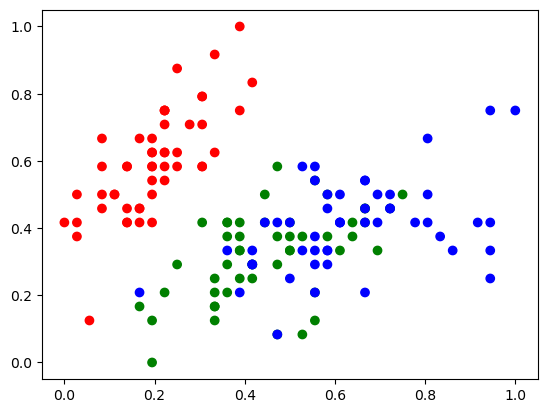

In [38]:
import matplotlib.pyplot as plt

warna = {'Iris-setosa':'red',
         'Iris-versicolor':'green',
         'Iris-virginica':'blue'}

plt.scatter(x=data_normal['sepal length'], y=data_normal['sepal width'], c=kelas.map(warna))
plt.plot()

## 4) K-Means Clustering

Sebelum mengimplementasikan algoritma K-Means, perlu dilakukan implementasi perhitungan jarak. K-Means pada praktikum ini menggunakan perhitungan jarak Euclidean. Implementasikan perhitungan jarak Euclidean menggunakan fungsi bernama **euclidean** pada cell di bawah ini

In [39]:
def euclidean(data1, data2):
    jarak = np.square(data1-data2)
    jarak = np.sum(jarak)
    return np.sqrt(jarak)

Langkah selanjutnya adalah implementasi algoritma K-Means. Tahapan-tahapan dalam algoritma K-Means adalah:


1.   Penentuan keanggotaan cluster secara acak
2.   Hitung centroid berdasarkan data yang ada di masing-masing cluster
3.   Alokasikan masing-masing data ke centroid terdekat
4.   Kembali ke langkah 2 selama kondisi berhenti belum terpenuhi. Iterasi berhenti jika salah satu kondisi berikut terpenuhi:
     a. Tidak ada perubahan keanggotaan cluster
     
     b. Iterasi melebihi parameter *iter_max*

Implementasikan algoritma K-Means menggunakan fungsi bernama **kmeans** pada cell di bawah ini. Fungsi **kmeans** memiliki 3 parameter input, yaitu data, K, dan iter_max



In [40]:
from random import randint
import copy

def kmeans(data_input, k, iter_max=200):
    n_data = data_input.shape[0]
    n_fitur = data_input.shape[1]
    iter = 1

    cluster = np.array([randint(0, k-1) for i in range(n_data)])
    centroid = np.zeros((k, n_fitur))
    cluster_tidak_berubah = False

    while cluster_tidak_berubah==False and iter<iter_max:
        jarak = np.zeros((n_data, k))
        for i in range(k):
            centroid[i, :] = data_input.iloc[np.where(cluster==i)[0]].mean().tolist()
        
        for i in range(n_data):
            for j in range(k):
                jarak[i][j] = euclidean(data_input.iloc[i], centroid[j])

        cluster_baru = [np.argmin(jarak[i]) for i in range(n_data)]
        cluster_tidak_berubah = np.array_equal(cluster_baru, cluster)
        cluster = np.array(copy.deepcopy(cluster_baru))

        iter+=1

    return cluster


In [41]:
cluster = kmeans(data_normal, 3)

Tampilkan keanggotaan cluster pada masing-masing data


In [42]:
print(cluster)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


Tampilkan hasil clustering menggunaka scatter plot

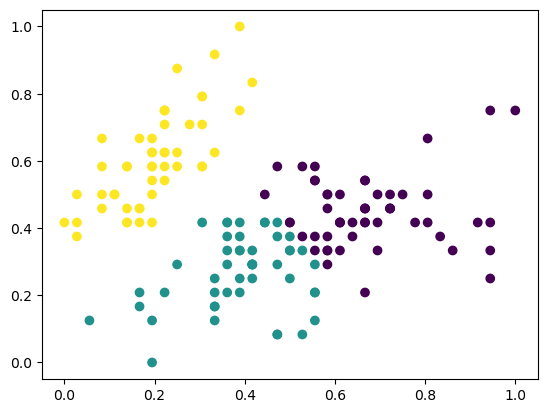

In [43]:
plt.scatter(data_normal['sepal length'], data_normal['sepal width'], c=cluster)

## TUGAS
Pada tugas kali ini Anda mengidentifikasikan pasangan fitur apa yang menghasilkan cluster yang ideal pada K-Means menggunakan data Iris.

Buatlah plot untuk setiap pasangan fitur yang mungkin.

In [44]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [47]:
feature_pairs = [['sepal length', 'sepal width'],
                 ['sepal length', 'petal width'],
                 ['sepal width', 'petal length'],
                 ['sepal width', 'petal width'],
                 ['petal length', 'petal width']]

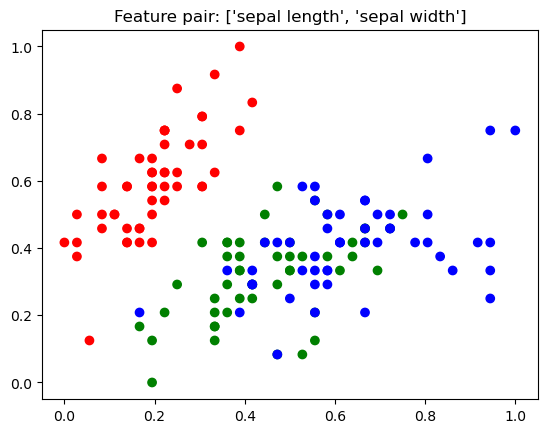

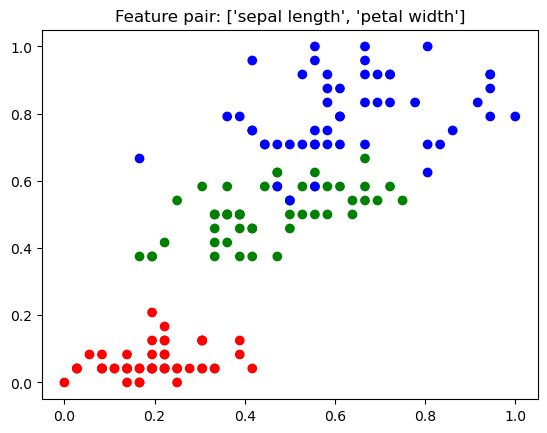

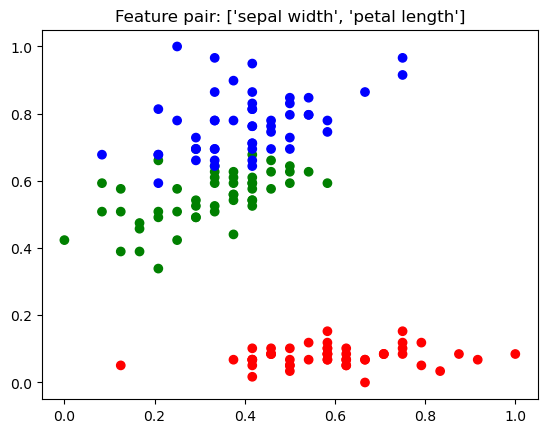

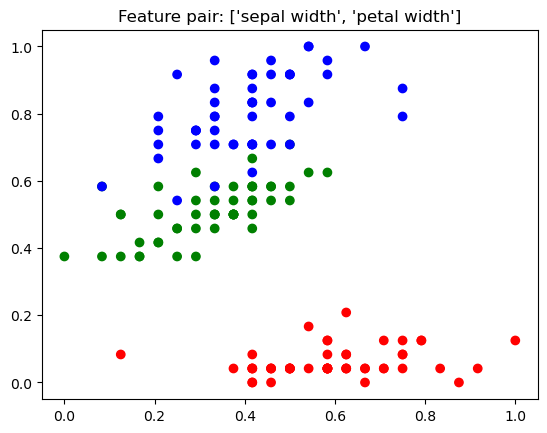

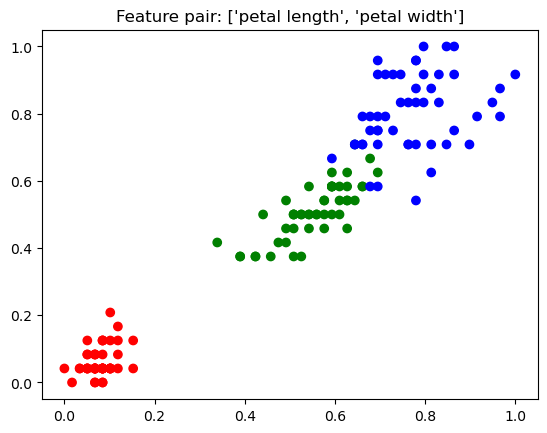

In [51]:
warna = {'Iris-setosa':'red',
         'Iris-versicolor':'green',
         'Iris-virginica':'blue'}

for feature_pair in feature_pairs:
    data_current = data[feature_pair].copy()
    data_current_normal = minmax(data_current)
    plt.scatter(x=data_current_normal[feature_pair[0]], y=data_current_normal[feature_pair[1]], c=kelas.map(warna))
    plt.plot()
    plt.title(f"Feature pair: {feature_pair}")
    plt.show()

Identifikasikan pasangan fitur apa yang dapat membedakan ketiga kelas dengan baik

Berdasarkan scatter plot di atas untuk kombinasi dua fitur yang tersedia (terdapat 5 kombinasi), didapatkan jika pasangan fitur 'petal length' dan 'petal width' mampu memisahkan ketiga kelas dari dataset Iris secara optimal jika dibandingkan dengan pasangan fitur lainnya.

Hal ini dikarenakan overlap antara cluster datapoint untuk pasangan fitur 'petal length' dan 'petal width' terjadi secara minimum. 
- Cluster 'Iris-setosa' (merah) terpisah secara sepenuhnya dari cluster 'Iris-versicolor' (hijau) dan 'Iris-virginica' (biru).
- Masih terdapat overlap antara cluster 'Iris-versicolor' dan cluster 'Iris-virginica', akan tetapi daerah overlap ini jauh lebih minimal jika dibandingkan dengan pasangan fitur lainnya.

Lakukan clustering menggunakan K-Means dengan k=3, apakah cluster yang dihasilkan juga terpisah dengan baik? Gunakan scatter plot untuk melihat hasil clustering

In [52]:
data2 = data[['petal length', 'petal width']].copy()
data2_normal = minmax(data2)
cluster2 = kmeans(data2_normal, 3)


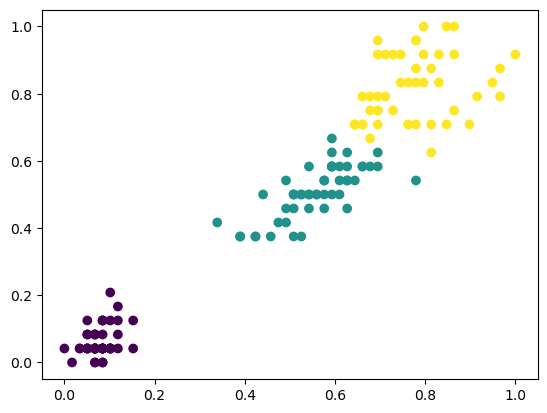

In [54]:
plt.scatter(data2_normal['petal length'], data2_normal['petal width'], c=cluster2)

[Apakah hasilnya baik? Mengapa?]

Berdasarkan K-Means clustering dengan menggunakan pasangan fitur 'petal length' dan 'petal width', didapatkan hasil dengan K-Means clustering seperti pada scatter plot di atas. Dari hasil scatter plot, didapatkan jika hasil pemisahan/klasifikasi antara 3 varietas Iris memberikan homogeneitas yang lebih baik.
- Iris-setosa benar-benar terisolasi dari cluster Iris-versicolor dan Iris-virginica tanpa adanya overlap.
- Antara Iris-versicolor dan Iris-virginica, overlap bisa direduksi dari sebelum dilakukan clustering K-Means. Meskipun tidak benar-benar terisolasi seperti Iris-setosa, akan tetapi terdapat perbedaan yang jelas antara data-data adjacent kedua cluster tersebut.

Perbaikan hasil dari sebelum dilakukan K-Means clustering dikarenakan adanya proses yang berlangsung iteratif dalam assignment centroid yang bertindak layaknya 'anchor point' untuk masing-masing cluster. Datapoints lainnya kemudian akan ditambahkan sesuai dengan centroid terdekat berdasarkan distance algorithm yang digunakan (dalam konteks ini adalah euclidean distance). Untuk setiap datapoint yang ditambahkan, centroid akan dievaluasi ulang untuk mereduksi data spread masing-masing cluster.